<a href="https://colab.research.google.com/github/emmafisch/NGG6050/blob/main/Parametric_Correlations.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Exercises 09/25/24: Parametric Correlation Coefficient

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as st
import pandas as pd
import seaborn as sns
import math

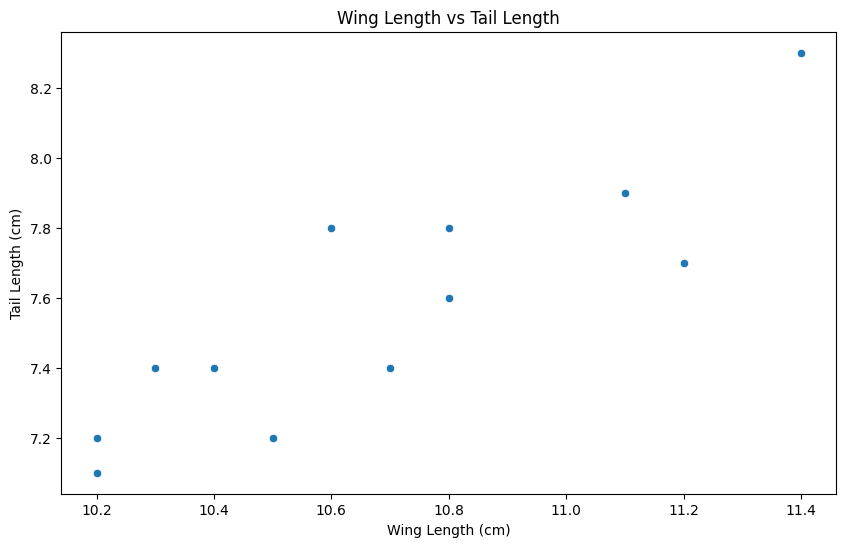

Yes, wing and tail length look positively correlated.


In [ ]:
# Question 1:
# Plot X vs Y. Do they look related?

# Store wing and tail lengths in arrays
wing_length = [10.4, 10.8, 11.1, 10.2, 10.3, 10.2, 10.7, 10.5, 10.8, 11.2, 10.6, 11.4]
tail_length = [7.4, 7.6, 7.9, 7.2, 7.4, 7.1, 7.4, 7.2, 7.8, 7.7, 7.8, 8.3]

# Create scatterplot of wing vs tail length
plt.figure(figsize=(10, 6))
sns.scatterplot(x=wing_length, y=tail_length, marker='o')
plt.title('Wing Length vs Tail Length')
plt.xlabel('Wing Length (cm)')
plt.ylabel('Tail Length (cm)')
plt.show()

print("Yes, wing and tail length look positively correlated.")

In [ ]:
# Question 2:
# Calculate r(x,y) and r(y,x), first using the equations above and then
# using the Python numpy funciton corrcoef. Did you get the same answers?

# Calculate rho(x,y):
wing_mean = np.sum(wing_length)/len(wing_length)
tail_mean = np.sum(tail_length)/len(tail_length)
numerator = 0
denom_x = 0
denom_y = 0
for i in range(len(wing_length)):
  x_par = wing_length[i] - wing_mean
  y_par = tail_length[i] - tail_mean
  numerator += x_par * y_par
  denom_x += x_par**2
  denom_y += y_par**2
rho_xy = numerator / (np.sqrt(denom_x) * np.sqrt(denom_y))
print(rho_xy)

# Calculate rho(y,x) using corrcoef:
rho_xy_py = np.corrcoef(wing_length, tail_length)[0, 1]
print(rho_xy_py)

# Calculate rho(y,x):
numerator = 0
denom_x = 0
denom_y = 0
for i in range(len(tail_length)):
  x_par = wing_length[i] - wing_mean
  y_par = tail_length[i] - tail_mean
  numerator += y_par * x_par
  denom_x += x_par**2
  denom_y += y_par**2
rho_yx = numerator / (np.sqrt(denom_x) * np.sqrt(denom_y))
print(rho_yx)

# Calculate rho(y,x) using corrcoef:
rho_yx_py = np.corrcoef(tail_length, wing_length)[0, 1]
print(rho_yx_py)

print("Yes, the equation and corrcoef generate the same answers. The order of x any y has no effect.")

0.8703545613058227
0.8703545613058227
0.8703545613058227
0.8703545613058227
Yes, the equation and corrcoef generate the same answers. The order of x any y has no effect.


In [ ]:
# Question 3
# What is the standard error of rho(x,y)?
# The 95% confidence intervals computed from the standard error?

# Calculate standard error of rho(x,y):
sr = np.sqrt((1 - rho_xy**2) / (len(wing_length) - 2))
print(f'The standard error of rho(x,y) = {sr}.')

# Calculate confidence interval for Pearson correlation:
z_transf = 0.5 * (np.log((1 + rho_xy) / (1 - rho_xy)))
sz = np.sqrt(1 / (len(wing_length) -3))
zscore = 1.96
ci_z = z_transf - (zscore * sz), z_transf + (zscore * sz)
r_upper = (np.exp(2 * ci_z[1]) - 1) / (np.exp(2 * ci_z[1]) + 1)
r_lower = (np.exp(-2 * ci_z[0]) - 1) / (np.exp(2 * ci_z[0]) + 1)
print(f'The 95% confidence intervals are ({r_lower:.3f}, {r_upper:.3f})')

The standard error of rho(x,y) = 0.15571863652567375.
The 95% confidence intervals are (-0.152, 0.963)


In [ ]:
# Question 4
# Should the value of rho(x,y) be considered significant at the p<0.05 level,
# given a two-tailed test (i.e., we reject if the test statistic is too large on
# either tail of the null distribution) for Ho = rho(x,y) = 0?

# Calculate t-statistic, where t=r/sr:
t_stat = rho_xy / sr
print(f'The t-statistic is {t_stat}.')

# Calculate p-val to check for significance:
p_val = 2 * (1- st.t.cdf(t_stat, len(wing_length) - 2))
print(f'The p-value is {p_val}.')

print("Yes, the value of rho(x,y) is significant at the p<0.05 level.")

The t-statistic is 5.589276792584329.
The p-value is 0.00023110594312059085.
Yes, the value of rho(x,y) is significant at the p<0.05 level.


In [ ]:
# Question 5
# Yale does the exact same study and finds that his correlation value is 0.75. Is this the same as yours?
# That is, evaluate Ho = r = rs = 0.75.

# Calculate t-statistic, where lambda = (zr - zrs)/sz
rs = 0.75
zr = z_transf
zrs = 0.5 * (np.log((1 + rs) / (1 - rs)))
t_yale = (zr - zrs) / sz
print(f'The lambda value is {t_yale}.')

# Calculate p-val to check for significance:
p_val_yale = 2 * (1- st.t.cdf(t_yale, len(wing_length) - 2))
print(f'The p-value is {p_val_yale}.')

print("These values of rho(x,y) are not significantly different at the p<0.05 level.")

The lambda value is 1.0847547271784326.
The p-value is 0.3034890172946687.
These values of rho(x,y) are not significantly different at the p<0.05 level.


In [ ]:
# Question 6:
# Finally, calculate the statistical power and sample size needed to reject H0: r = 0 when r > 0.5.

# Use power function to calculate power
import numpy as np
from statsmodels.stats.power import NormalIndPower

# Set model parameters
effect_size = 0.5  # Target r
alpha = 0.05
power = 0.8
power_analysis = NormalIndPower()

# Calculate required sample size
sample_size = power_analysis.solve_power(effect_size=np.arctanh(effect_size), power=power, alpha=alpha, alternative='two-sided')

print(f'Required sample size: {int(np.ceil(sample_size))}')


Required sample size: 53
